In [9]:
import nshtrainer.ll as ll

ll.pretty()

In [2]:
from pathlib import Path

from jmppeft.tasks.finetune import dataset_config as DC

# from jmppeft.datasets.matbench_discovery_megnet_npz import

base_path = Path("/mnt/datasets/matbench-discovery-traj/megnet-133k-npz/")
config = DC.matbench_discovery_config(
    base_path,
    "val",
    use_megnet_133k=True,
    use_atoms_metadata=True,
    use_linref=True,
)
config

[00:16:59] CRITICAL Type checking the following modules: ('jmppeft',)                               ]8;id=69172;file:///workspaces/ll/src/ll/typecheck.py\typecheck.py]8;;\:]8;id=692501;file:///workspaces/ll/src/ll/typecheck.py#65\65]8;;\

Loading 'wbm_summary' from cached file at '/root/.cache/matbench-discovery/1.0.0/wbm/2023-12-13-wbm-summary.csv.gz'


FinetuneMatbenchDiscoveryMegNet133kDatasetConfig(base_path=Path('/mnt/datasets/matbench-discovery-traj/megnet-133k-npz/val'), energy_linref_path=Path('/mnt/datasets/matbench-discovery-traj/megnet-133k-npz/linrefs.npy'))

In [3]:
dataset = config.create_dataset()
print(len(dataset))

9384


In [4]:
import numpy as np
from torch.utils.data import DataLoader
from torch_geometric.data import Data
from tqdm.auto import tqdm


def collate_fn(data_list: list[Data]):
    return np.array([data.atomic_numbers.numel() for data in data_list], dtype=np.int32)


dataloader = DataLoader(
    dataset,
    batch_size=256,
    collate_fn=collate_fn,
    pin_memory=False,
    num_workers=0,
)

natoms_list: list[np.ndarray] = []
for batch in tqdm(dataloader, total=len(dataloader)):
    natoms_list.append(batch)

print(len(natoms_list))

  0%|          | 0/37 [00:00<?, ?it/s]

37


In [5]:
natoms_cat = np.concatenate(natoms_list, axis=0)
natoms_cat

array[9384] i32 37Kb x∈[1, 296] μ=30.003 σ=28.959

<Axes: ylabel='Count'>

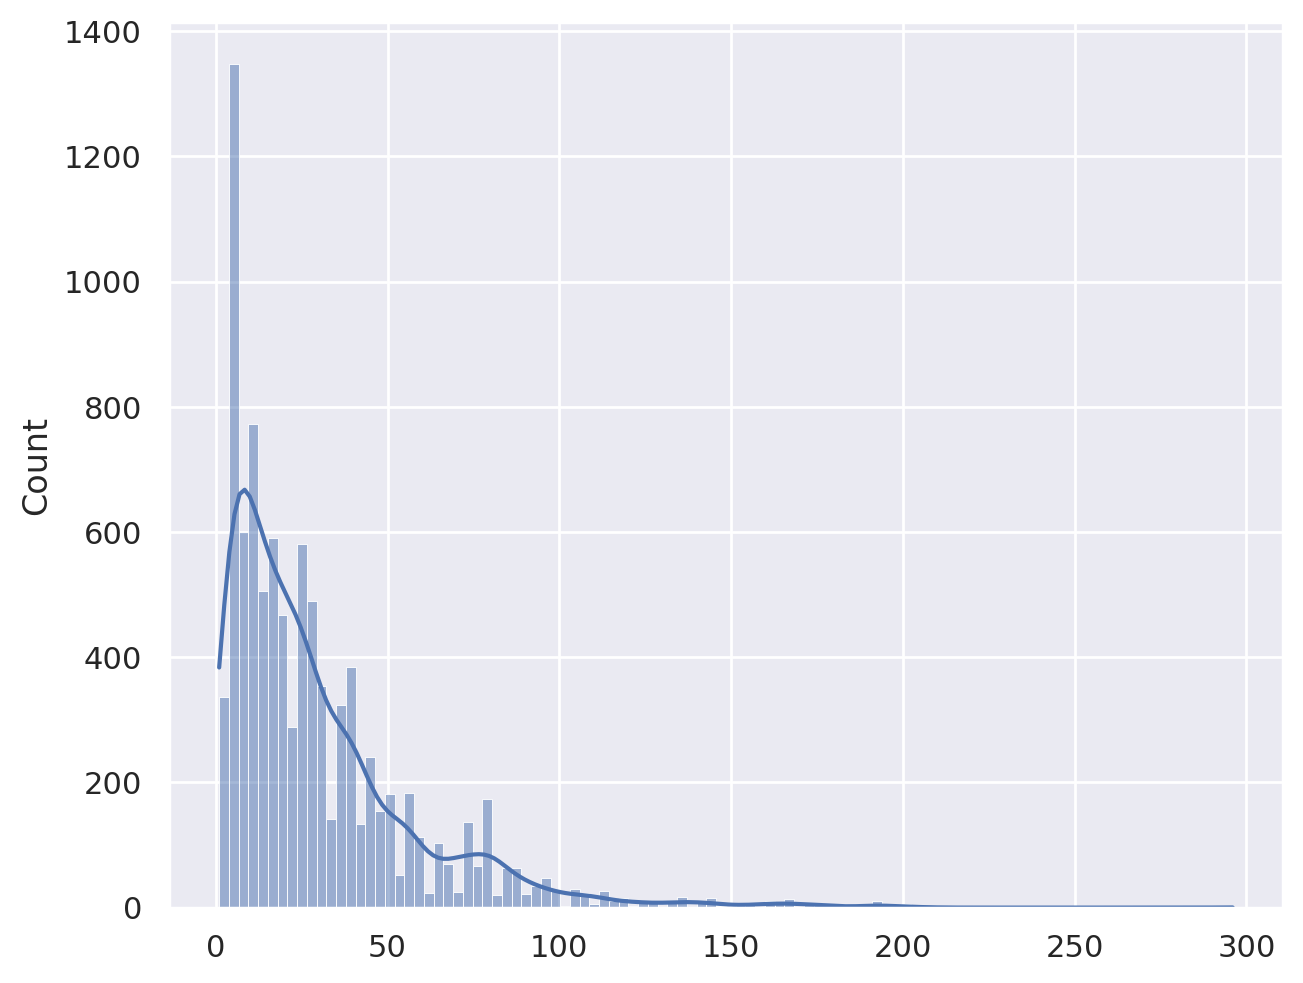

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme()

sns.histplot(natoms_cat, kde=True)

(-500.0, 500.0)

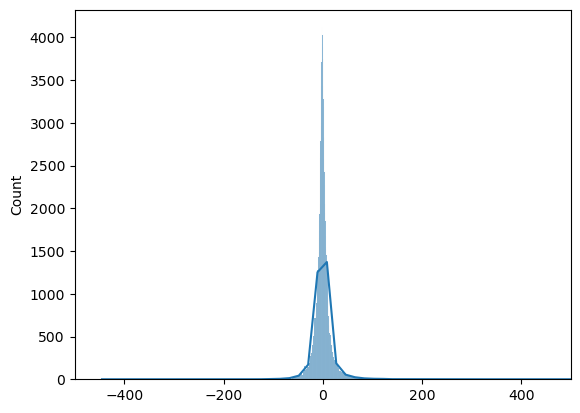

In [12]:
import seaborn as sns

energies_np = np.array(energies)
sns.histplot(energies_np, kde=True)
plt.xlim(-500, 500)